In [4]:
%pip install gym matplotlib stable_baselines3 gym_anytrading
%pip install 'shimmy>=0.2.1'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


/Users/tarus/Desktop/Stuff/FinSearch-Project-2023/FinSearch-Project-2023/.conda/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  logger.warn(
/Users/tarus/Desktop/Stuff/FinSearch-Project-2023/FinSearch-Project-2023/.conda/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/Users/tarus/Desktop/Stuff/FinSearch-Project-2023/FinSearch-Project-2023/.conda/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WA

Using cpu device
info {'total_reward': -117.399999999996, 'total_profit': 0.7484677179967285, 'position': 0}


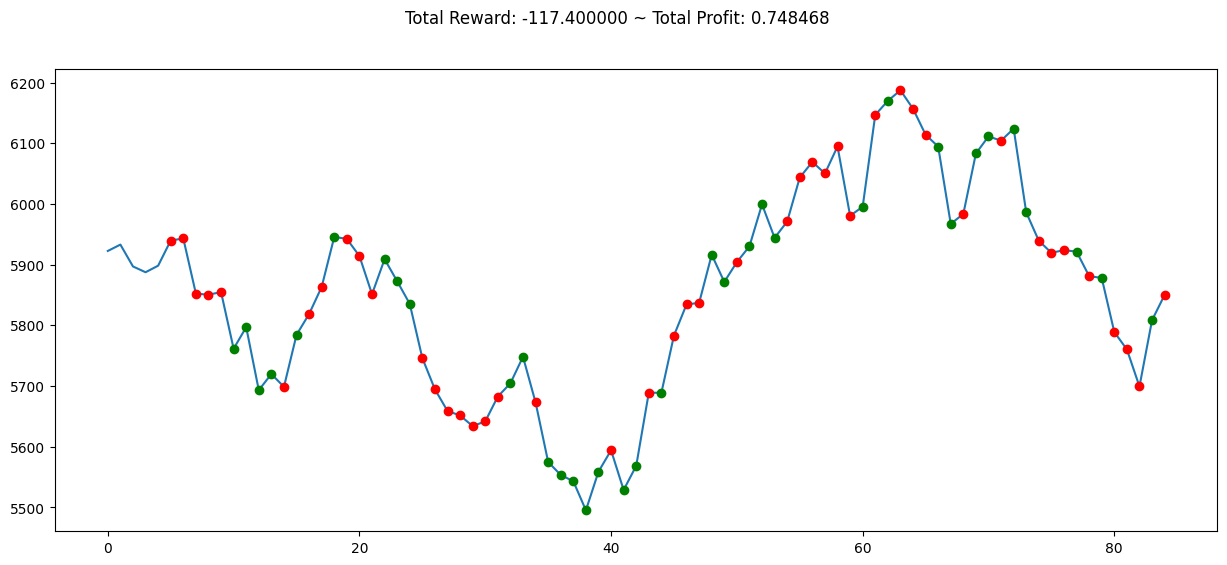

In [6]:
# Install the required libraries
# Make sure you have the latest versions of stable-baselines3, gym, and pandas installed
# !pip install stable-baselines3[extra] gym pandas

# Import the required libraries
import gym
import gym_anytrading

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv

# Load your data and preprocess it
df = pd.read_csv('./TEST/Untitled spreadsheet - NIFTY50.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Define your custom gym environment function
def env_maker():
    return gym.make('stocks-v0', df=df, frame_bound=(5, 1000), window_size=5)

# Create the environment using make_vec_env
env = DummyVecEnv([env_maker])

# Train the A2C model
model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100)

# Test the trained model on a different time frame
test_env = gym.make('stocks-v0', df=df, frame_bound=(20, 100), window_size=5)
obs = test_env.reset()

while True:
    action, _states = model.predict(obs)
    obs, rewards, done, info = test_env.step(action)
    if done:
        print("info", info)
        break

# Plot the results
plt.figure(figsize=(15, 6))
plt.cla()
test_env.render_all()
plt.show()


In [3]:
env.action_space
env.observation_space

Box(-inf, inf, (5, 2), float64)